# Clustering - US States

Using the K-Means clustering algorithm, it will create clusters with the Covid-19 data in US States. </br>
The main objective with looking at geography is to see if the clustering will show a direct relationship between the number of covid cases and population density in the states.</br>
There should be obvious signs in our clusters that the counties that are located near populous cities have drastically more covid cases.</br></br>

Data is taken from: https://covid.cdc.gov/covid-data-tracker/#cases_newcases


### Importing all the libraries and data

In [1]:
# import libraries

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

In [24]:
# import the data csv file

data = pd.read_csv('united_states_covid19_cases_deaths_and_testing_by_state.csv', skiprows=2, on_bad_lines='skip')
data.columns = [x.replace("\n", " ") for x in data.columns.to_list()]
data.head()

,State/Territory,Total Cases,New Cases in Past Week,Case Rate per 100000,Total Deaths,New Deaths in Past Week,Death Rate per 100000,Weekly Cases Rate per 100000,Weekly Death Rate per 100000,Total % Positive,% Positive Last 30 Days,% Positive Last 7 Days,# Tests per 100K,Total # Tests,# Tests per 100K Last 7 Days,Total # Tests Last 7 Days,# Tests per 100K Last 30 Days,Total # Tests Last 30 Days
0,Alabama,1555092,5807,31716,20682,30,421,118.4,0.6,10-14.9%,5-7.9%,8-9.9%,177083.2741,8715210.0,749.32,36878.0,2580.17,126984.0
1,Alaska,287057,496,39240,1399,0,191,67.8,0.0,8-9.9%,5-7.9%,3-4.9%,641792.0614,4692514.0,1118.91,8181.0,4536.23,33167.0
2,Arizona,2353530,15983,32334,31822,71,437,219.6,1.0,10-14.9%,20-24.9%,20-24.9%,213885.1680,15873276.0,503.54,37370.0,1886.03,139970.0
3,Arkansas,972465,3593,32224,12603,39,417,119.1,1.3,10-14.9%,5-7.9%,10-14.9%,173176.1063,5248140.0,436.00,13213.0,1843.64,55872.0
4,California,11602129,80581,29363,96995,192,245,203.9,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Prepping for K-means CLustering

In [25]:
X = data[['Total Cases','New Cases in Past Week']]

### Elbow Method to Find the Optimal K-value

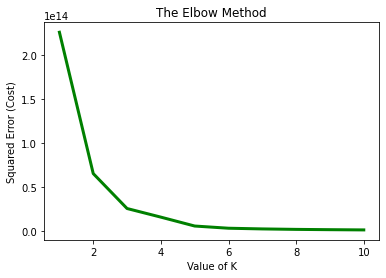

In [26]:
cost =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(X)
     
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)    
 
# plot the cost against K values
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.title('The Elbow Method')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot

### Implementation of K-means clustering using the Sklearn library

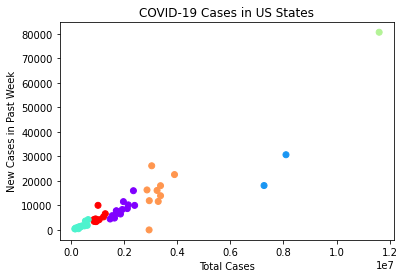

In [31]:
# Using sklearn library, implement K-means clustering

kmeans = KMeans(6) # From the value taken from the elbow method
kmeans.fit(X)
identified_clusters = kmeans.fit_predict(X)

data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Total Cases'],data_with_clusters['New Cases in Past Week'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.title('COVID-19 Cases in US States')
plt.xlabel('Total Cases')
plt.ylabel('New Cases in Past Week')
plt.show()

### Evaluating the Quality of the Clustering with the Silhouette Score

In [32]:
score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
print('Average Silhouette Score over All Samples: %.3f' % score)

Average Silhouette Score over All Samples: 0.661
